# environment

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
import gc, argparse, sys, os, errno
from IPython.core.display import HTML,Image
from functools import reduce
import h5py
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook, show
output_notebook()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.neighbors import NearestNeighbors
from bokeh.palettes import Category20c,Set3,Pastel2
from ipywidgets import interact,interactive, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text
from IPython.core.display import HTML,Image
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from IPython.display import HTML, display, FileLink
from base64 import b64encode, b64decode
from io import StringIO, BytesIO
from contextlib import contextmanager

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

In [2]:
cd ~chenxupeng/projects/exSEEK_training/

/home/chenxupeng/projects/exSEEK_training


In [3]:
# setup figure template
figure_template_path = 'bin'
if figure_template_path not in sys.path:
    sys.path.append(figure_template_path)
from importlib import reload
import figure_template
# force reload of the module
reload(figure_template)
from figure_template import display_dataframe, embed_pdf_figure, embed_pdf_pages,std_plot

In [4]:
fontsize = 6.5
fontscale = 1
fontweight =  'normal'
fonttitle = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontlabel = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontticklabel = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontlegend = {'family':'Arial',
                  'weight' : fontweight, 
              #'linewidth':0.5,
                  'size' : fontsize*fontscale}
fontcbarlabel = {'family':'Arial',
                 'weight' : fontweight, 
                 #'Rotation' : 270,
                 #'labelpad' : 25,
                 'size' : fontsize*fontscale}
fontcbarticklabel = {'family':'Arial',#Helvetica
                 'weight' : fontweight, 
                 'size' : (fontsize-1)*fontscale}

def std_plot(ax,xlabel=None,ylabel=None,title=None,
             legendtitle=None,bbox_to_anchor=None,
             labelspacing=0.2,borderpad=0.2,handletextpad=0.2,legendsort=False,markerscale=None,
             xlim=None,ylim=None,
             xbins=None,ybins=None,
             cbar=None,cbarlabel=None,
             moveyaxis=False,sns=False,left=True,rotation=None,xticklabel=None,legendscale=True,h=None,l=None,**kwards):
        # height = 2 font = 6.5
    def autoscale(fig):
        if isinstance(fig,matplotlib.figure.Figure):
            width,height = fig.get_size_inches()
        elif isinstance(fig,matplotlib.axes.Axes):
            width,height = fig.figure.get_size_inches()
        fontscale = height/2
        if width/fontscale > 8:
            warnings.warn("Please reset fig's width. When scaling the height to 2 in, the scaled width '%.2f' is large than 8"%(width/fontscale),UserWarning)
        return fontscale
    
    class fontprop:
        def init(self,fonttitle=None,fontlabel=None,fontticklabel=None,fontlegend=None,fontcbarlabel=None,fontcbarticklabel=None):
            self.fonttitle = fonttitle
            self.fontlabel = fontlabel
            self.fontticklabel = fontticklabel
            self.fontlegend = fontlegend
            self.fontcbarlabel = fontcbarlabel
            self.fontcbarticklabel = fontcbarticklabel
        def update(self,fontscale):
            self.fonttitle['size'] = self.fonttitle['size']*fontscale
            self.fontlabel['size'] = self.fontlabel['size']*fontscale
            self.fontticklabel['size'] = self.fontticklabel['size']*fontscale
            self.fontlegend['size'] = self.fontlegend['size']*fontscale
            self.fontcbarlabel['size'] = self.fontcbarlabel['size']*fontscale
            self.fontcbarticklabel['size'] = self.fontcbarticklabel['size']*fontscale
        def reset(self,fontscale):
            self.fonttitle['size'] = self.fonttitle['size']/fontscale
            self.fontlabel['size'] = self.fontlabel['size']/fontscale
            self.fontticklabel['size'] = self.fontticklabel['size']/fontscale
            self.fontlegend['size'] = self.fontlegend['size']/fontscale
            self.fontcbarlabel['size'] = self.fontcbarlabel['size']/fontscale
            self.fontcbarticklabel['size'] = self.fontcbarticklabel['size']/fontscale
    fontscale = autoscale(ax)
    font = fontprop()
    font.init(fonttitle,fontlabel,fontticklabel,fontlegend,fontcbarlabel,fontcbarticklabel)
    font.update(fontscale)
    
    pyplot.draw()
    #plt.figure(linewidth=30.5)
    if xlim is not None:  
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
    #pyplot.draw()
    if xbins is not None:
        locator = MaxNLocator(nbins=xbins)
        locator.set_axis(ax.xaxis)
        ax.set_xticks(locator())
    if ybins is not None:
        locator = MaxNLocator(nbins=ybins)
        locator.set_axis(ax.yaxis)
        ax.set_yticks(locator())
    pyplot.draw()
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(xlabel,fontdict = font.fontlabel,labelpad=(fontsize-1)*fontscale)
    ax.set_ylabel(ylabel,fontdict = font.fontlabel,labelpad=(fontsize-1)*fontscale)
    if (rotation is not None) & (xticklabel is not None) :
        ax.set_xticklabels(xticklabel,fontticklabel,rotation=rotation)
    elif (xticklabel is not None) &(rotation is None):
        ax.set_xticklabels(xticklabel,fontticklabel)
    elif (xticklabel is None) &(rotation is None):
        ax.set_xticklabels(ax.get_xticklabels(),fontticklabel)
    elif (rotation is not None) & (xticklabel is None):
        ax.set_xticklabels(ax.get_xticklabels(),fontticklabel,rotation=rotation)
    ax.set_yticklabels(ax.get_yticklabels(),font.fontticklabel)

    if moveyaxis is True:
        #fontticklabel 
        ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(not left)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(0.5*fontscale)
    ax.spines['bottom'].set_linewidth(0.5*fontscale)
    ax.spines['left'].set_linewidth(0.5*fontscale)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    
    ax.tick_params(direction='out', pad=2*fontscale,width=0.5*fontscale)
    #ax.spines['bottom']._edgecolor="#000000"
    #ax.spines['left']._edgecolor="#000000"
    if title is not None:
        ax.set_title(title,fontdict = font.fonttitle)
    if legendscale is True:
        if (h is None)&(l is None):
            legend = ax.legend(prop=font.fontlegend,
                  bbox_to_anchor=bbox_to_anchor,
                  labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        else:
            legend = ax.legend(h,l,prop=font.fontlegend,
                  bbox_to_anchor=bbox_to_anchor,
                  labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
    if legendtitle is not None:
        #if legendloc is None:
        #    legendloc="best"
        legend = ax.legend(title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        ax.legend_.get_frame()._linewidth=0.5*fontscale
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(fontscale*fontsize)
        if legendsort is True:
            # h: handle l:label
            h,l = ax.get_legend_handles_labels()
            l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h,l,title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
            ax.legend_.get_frame()._linewidth=0.5*fontscale
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(fontscale*fontsize)
        if sns is True:
            h,l = ax.get_legend_handles_labels()
            #l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h[1:],l[1:],title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
            ax.legend_.get_frame()._linewidth=0.5*fontscale
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(fontscale*fontsize)
    else:
        legend = ax.legend(handles=h,labels=l,title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        ax.legend_.get_frame()._linewidth=0.5*fontscale
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(fontscale*fontsize)

    if cbar is not None:
        #locator, formatter = cbar._get_ticker_locator_formatter()
        #ticks, ticklabels, offset_string = cbar._ticker(locator, formatter)
        #cbar.ax.spines['top'].set_visible(False)
        #cbar.ax.spines['right'].set_visible(False)
        #cbar.ax.spines['bottom'].set_visible(False)
        #cbar.ax.spines['left'].set_visible(False)
        cbar.ax.tick_params(direction='out', pad=3*fontscale,width=0*fontscale,length=0*fontscale)
        cbar.set_label(cbarlabel,fontdict = font.fontcbarlabel,Rotation=270,labelpad=fontscale*(fontsize+1))
        cbar.ax.set_yticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),font.fontcbarticklabel)
    font.reset(fontscale)
    return ax





In [5]:
savepath = '/home/chenxupeng/projects/exSEEK_training/'+'output/'+'fig3'+'/'

if not os.path.exists(savepath):
    os.mkdir(savepath)

# color

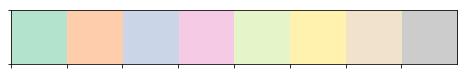

In [6]:
sns.palplot(Pastel2[8])

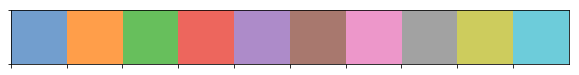

In [7]:
tableau10m = np.array([(114,158,206),(255,158,74),(103,191,92),(237,102,93),(173,139,201),
                       (168,120,110),(237,151,202),(162,162,162),(205,204,93),(109,204,218)])/255
sns.palplot(tableau10m)

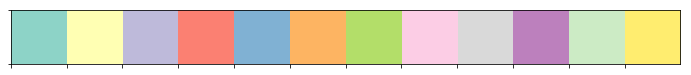

In [8]:
sns.palplot(Set3[12])

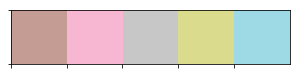

In [9]:
tableau10l5 = np.array([(196,156,148),(247,182,210),(199,199,199),(219,219,141),(158,218,229)])/255
sns.palplot(tableau10l5)

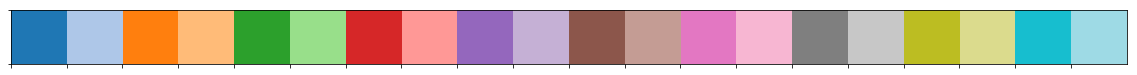

In [10]:
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255.
sns.palplot(tableau20)

In [11]:
def legendhandle(lists,porm=True,order=0):
    '''
        input: array,porm palette or marker
        palettesorder=0 dataset Category20c
        palettesorder=1 batch

        return a dic mapping levels of the hue variable to colors
        or return a dic mapping levels of the style variable to markers
        when use sns function, set palette=dic or markers=dic

    '''
    if porm == True:
        if order == 0:
            palette = np.array(Category20c[20]).reshape(4,-1).T.ravel()
        if order == 1:
            palette = Set3[12]
        lists.sort()
        dic={}
        for i in range(len(lists)):
            dic[lists[i]]=palette[i]
        return dic
    else:
        markerlist1 = ['v','^','<','>'] #triangle_down triangle_up triangle_left triangle_left
        markerlist2 = ['P','o','X','s'] #plus (filled) circle x (filled) square
        #markerlist3 = ['$CPM$','$CPM_top$','$RLE$','$TMM$']
        markerlist3 = ['$f$','$g$','$h$','$l$']
        markerlist3.sort()
        if order == 0:
            markers = markerlist2
        if order == 1:
            markers = markerlist1
        if order == 2:
            markers = markerlist3
            
        lists.sort()
        dic={}
        for i in range(len(lists)):
            dic[lists[i]]=markers[i]
        return dic       


In [13]:
tips = sns.load_dataset("tips")
legendhandle(np.unique(tips['smoker']),True,1)

{'No': '#8dd3c7', 'Yes': '#ffffb3'}

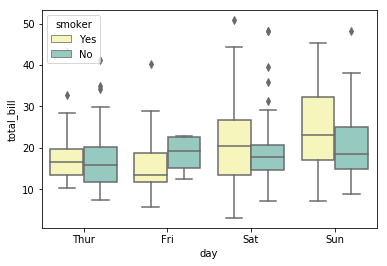

In [14]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette=legendhandle(np.unique(tips['smoker']),True,1))

In [15]:
legendhandle(np.unique(tips['smoker']),True,0)

{'No': '#3182bd', 'Yes': '#fd8d3c'}

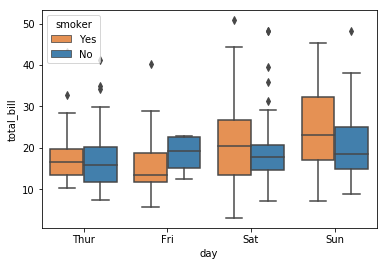

In [16]:
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette=legendhandle(np.unique(tips['smoker']),True,0))

In [17]:
A = ['Norm_RLE', 'Norm_RLE', 'Norm_RLE', 'Norm_RLE', 'Norm_CPM',
       'Norm_CPM', 'Norm_CPM', 'Norm_CPM', 'Norm_CPM_top', 'Norm_CPM_top',
       'Norm_CPM_top', 'Norm_CPM_top', 'Norm_TMM', 'Norm_TMM', 'Norm_TMM',
       'Norm_TMM']

In [18]:
A

['Norm_RLE',
 'Norm_RLE',
 'Norm_RLE',
 'Norm_RLE',
 'Norm_CPM',
 'Norm_CPM',
 'Norm_CPM',
 'Norm_CPM',
 'Norm_CPM_top',
 'Norm_CPM_top',
 'Norm_CPM_top',
 'Norm_CPM_top',
 'Norm_TMM',
 'Norm_TMM',
 'Norm_TMM',
 'Norm_TMM']

In [19]:
legendhandle(np.unique(A),False,2)

{'Norm_CPM': '$f$',
 'Norm_CPM_top': '$g$',
 'Norm_RLE': '$h$',
 'Norm_TMM': '$l$'}

# RLE

In [20]:
def plotRLE(mat,batch=None,label=None,logged=False,path=None,filename=None,title=None):
    """
    mat: DataFrame, expression matrix
    batch: DataFrame, optional, if given, batch.index must be contained in mat.columns
    label: One of batch.columns by which the samples are grouped in the figure
    """
    log_mat = mat if logged else np.log2(mat+1)
    feature_meds = log_mat.apply(np.median,1).tolist()
    for i in np.arange(len(feature_meds)):
        log_mat.iloc[i] = log_mat.iloc[i] - feature_meds[i]
    mat_rle = log_mat
    distance = 0
    for i in range(mat_rle.shape[1]):
        small,large = np.percentile(mat_rle.iloc[:,i], [25, 75])
        distance = distance+(large-small)**2
    score = distance/mat_rle.shape[1]
    stack = mat_rle.stack().reset_index()
    stack.rename(columns={stack.columns[2]:"counts", stack.columns[1]: "index"},inplace=True)
    #stack['class'] = None
    if batch is not None:
        batch.index.name = 'index'
        batch = batch[label].reset_index()
        stack = pd.merge(stack, batch, on=['index'])
        fig,ax = plt.subplots(figsize=(2.8,2))
        #ax = sns.boxplot(x='index',y='counts',data=stack.sort_values(by=label),fliersize=0,linewidth=0.1,width=1,hue=label,hue_order=np.unique(np.array(stack.loc[:,label])).sort(),dodge=False)
        ax = sns.boxplot(x='index',y='counts',data=stack.sort_values(by=label),
                     fliersize=0,linewidth=0,width=0.8,hue=label,
                     hue_order=np.unique(np.array(stack.loc[:,label])).sort(),
                     notch = True,showfliers=False,showmeans=False,showcaps=False,whiskerprops=dict(linewidth=0.5,color='#D8D8D8'),
                     dodge=False,palette=legendhandle(np.unique(stack.dataset)))  
        ax.annotate('variation score: %.2f'%score,xy=(mat_rle.shape[1]*0.6,-3),
                          fontfamily='Arial',fontsize=5.5)
        ax.set(xticks=[])
        std_plot(ax,'samples','Relative log expression',legendtitle='label',legendsort=False,title=title,ybins=4,bbox_to_anchor=(1.1,1.1),ylim=[-4,4])
    else:
        fig,ax = plt.subplots(figsize=(3.3,2))
        ax = sns.boxplot(x='index',y='counts',data=stack,fliersize=0,linewidth=0.1,width=1,color='g')
        ax.set(xticks=[])
        std_plot(ax,'samples','RLE',legendtitle='label',legendsort=False,ylim=[-10,10],title=title,ybins=4)
    #ax.legend_.remove()
    legend = ax.legend(prop=fontlegend,
                  #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,bbox_to_anchor=(1.05, 0.75))
    ax.legend_.get_frame()._linewidth=0
    #ax.legend_.remove()
    ax.spines['bottom'].set_visible(False)
    fig.tight_layout()
    embed_pdf_figure()
    fig.savefig(path+filename)

In [21]:
normlist= ['filter.null.Norm_RLE','filter.null.Norm_CPM','filter.null.Norm_CPM_top',#'filter.null.Norm_null',
           #'filter.null.Norm_CPM_top_5','filter.null.Norm_CPM_top_10',
           #'filter.null.Norm_CPM_top_20','filter.null.Norm_CPM_top_40',
           'filter.null.Norm_TMM']
batchlist = ['Batch_ComBat_1','Batch_null','Batch_RUV','Batch_limma_1']

In [22]:
methodlist = []
for i in normlist:
    #for j in batchlist:
    j=batchlist[1]
    methodlist.append(i+'.'+j)
methodlist

['filter.null.Norm_RLE.Batch_null',
 'filter.null.Norm_CPM.Batch_null',
 'filter.null.Norm_CPM_top.Batch_null',
 'filter.null.Norm_TMM.Batch_null']

In [23]:
methodlist = ['filter.null.Norm_RLE.Batch_null']

In [24]:
class_info = pd.read_table('/home/xieyufeng/fig3/data/cfRNA/batch_info.txt',index_col=0)
class_info[class_info.dataset=='lulab_hcc']='GSE123972'


In [25]:
class_info = pd.read_table('/home/zhaotianxiao/fig3/batch_info.txt', index_col=0)
class_info[class_info.dataset=='lulab_hcc']='GSE123972'

In [26]:
methodlist

['filter.null.Norm_RLE.Batch_null']

In [27]:
#titlelist=['CPM','CPM-top','RLE','TMM']
titlelist=['RLE']
j=0
for i in tqdm((methodlist)):
    table = pd.read_table('~/fig3/output/'+'cfRNA'+'/matrix_processing/'+i+'.mirna_and_domains.txt',
                           index_col=0)
    plotRLE(table,batch=class_info,label='dataset',path=savepath,filename='RLE_leg_big{}.eps'.format(i),title=titlelist[j])
    j=j+1
    

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

In [28]:
def plotRLE(mat,batch=None,label=None,logged=False,path=None,filename=None,title=None):
    """
    mat: DataFrame, expression matrix
    batch: DataFrame, optional, if given, batch.index must be contained in mat.columns
    label: One of batch.columns by which the samples are grouped in the figure
    """
    log_mat = mat if logged else np.log2(mat+1)
    feature_meds = log_mat.apply(np.median,1).tolist()
    for i in np.arange(len(feature_meds)):
        log_mat.iloc[i] = log_mat.iloc[i] - feature_meds[i]
    mat_rle = log_mat
    distance = 0
    for i in range(mat_rle.shape[1]):
        small,large = np.percentile(mat_rle.iloc[:,i], [25, 75])
        distance = distance+(large-small)**2
    score = distance/mat_rle.shape[1]
    stack = mat_rle.stack().reset_index()
    stack.rename(columns={stack.columns[2]:"counts", stack.columns[1]: "index"},inplace=True)
    #stack['class'] = None
    if batch is not None:
        batch.index.name = 'index'
        batch = batch[label].reset_index()
        stack = pd.merge(stack, batch, on=['index'])
        fig,ax = plt.subplots(figsize=(2,2))
        #ax = sns.boxplot(x='index',y='counts',data=stack.sort_values(by=label),fliersize=0,linewidth=0.1,width=1,hue=label,hue_order=np.unique(np.array(stack.loc[:,label])).sort(),dodge=False)
        ax = sns.boxplot(x='index',y='counts',data=stack.sort_values(by=label),
                     fliersize=0,linewidth=0,width=0.8,hue=label,
                     hue_order=np.unique(np.array(stack.loc[:,label])).sort(),
                     notch = True,showfliers=False,showmeans=False,showcaps=False,whiskerprops=dict(linewidth=0.5,color='#D8D8D8'),
                     dodge=False,palette=legendhandle(np.unique(stack.dataset)))  
        ax.annotate('variation score: %.2f'%score,xy=(mat_rle.shape[1]*0.4,-9),
                          fontfamily='Arial',fontsize=5.5)
        ax.set(xticks=[])
        std_plot(ax,'samples','Relative log expression',legendtitle='label',legendsort=False,title=title,ybins=4,bbox_to_anchor=(1.1,1.1))#,ylim=[-4,4])
    else:
        fig,ax = plt.subplots(figsize=(3.3,2))
        ax = sns.boxplot(x='index',y='counts',data=stack,fliersize=0,linewidth=0.1,width=1,color='g')
        ax.set(xticks=[])
        std_plot(ax,'sample','RLE',legendtitle='label',legendsort=False,ylim=[-10,10],title=title,ybins=4)
    #ax.legend_.remove()
    legend = ax.legend(prop=fontlegend,
                  #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,bbox_to_anchor=(1.05, 0.75))
    ax.legend_.get_frame()._linewidth=0
    ax.legend_.remove()
    ax.spines['bottom'].set_visible(False)
    fig.tight_layout()
    embed_pdf_figure()
    fig.savefig(path+filename)

In [29]:
table = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/count_matrix/mirna_and_domains.txt',
                           index_col=0)
plotRLE(table,batch=class_info,label='dataset',path=savepath,filename='RLE_noleg_{}.eps'.format('null'),title='Raw')

In [30]:
def plotRLE(ax,mat,batch=None,label=None,logged=False,path=None,filename=None,title=None,ylim=None,ylabel='',color='#E5E5E5'):
    """
    mat: DataFrame, expression matrix
    batch: DataFrame, optional, if given, batch.index must be contained in mat.columns
    label: One of batch.columns by which the samples are grouped in the figure
    """
    log_mat = mat if logged else np.log2(mat+1)
    feature_meds = log_mat.apply(np.median,1).tolist()
    for i in np.arange(len(feature_meds)):
        log_mat.iloc[i] = log_mat.iloc[i] - feature_meds[i]
    mat_rle = log_mat
    distance = 0
    for i in range(mat_rle.shape[1]):
        small,large = np.percentile(mat_rle.iloc[:,i], [25, 75])
        distance = distance+(large-small)**2
    score = distance/mat_rle.shape[1]
    stack = mat_rle.stack().reset_index()
    stack.rename(columns={stack.columns[2]:"counts", stack.columns[1]: "index"},inplace=True)
    #stack['class'] = None
    if batch is not None:
        batch.index.name = 'index'
        batch = batch[label].reset_index()
        stack = pd.merge(stack, batch, on=['index'])
        
        #ax = sns.boxplot(x='index',y='counts',data=stack.sort_values(by=label),fliersize=0,linewidth=0.1,width=1,hue=label,hue_order=np.unique(np.array(stack.loc[:,label])).sort(),dodge=False)
        ax = sns.boxplot(ax=ax,x='index',y='counts',data=stack.sort_values(by=label),
                     fliersize=0,linewidth=0,width=0.8,hue=label,
                     hue_order=np.unique(np.array(stack.loc[:,label])).sort(),
                     notch = True,showfliers=False,showmeans=False,showcaps=False,whiskerprops=dict(linewidth=0.4,color=color),
                     dodge=False,palette=legendhandle(np.unique(stack.dataset)))       
        ax.set(xticks=[])
        std_plot(ax,'Samples',ylabel,legendtitle='label',legendsort=False,title=title,ybins=4,ylim=ylim)
        ax.annotate('$variation\ score$: %.2f'%score,xy=(mat_rle.shape[1]*0.4,ax.get_ylim()[0]*0.9+ax.get_ylim()[1]*0.1),
                          fontfamily='Arial',fontsize=5.5)
    else:
        #fig,ax = plt.subplots(figsize=(3,2))
        ax = sns.boxplot(ax=ax,x='index',y='counts',data=stack,fliersize=0,linewidth=0.1,width=1,color='g')
        ax.set(xticks=[])
        std_plot(ax,'sample','RLE',legendtitle='label',legendsort=False,ylim=[-10,10],title=title,ybins=4)
    #ax.legend_.remove()
    legend = ax.legend(prop=fontlegend,
                  #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,bbox_to_anchor=(1.05, 0.75))
    ax.legend_.get_frame()._linewidth=0
    ax.legend_.remove()
    ax.spines['bottom'].set_visible(False)

In [31]:
methodlist

['filter.null.Norm_RLE.Batch_null']

In [32]:
#titlelist=['RLE','CPM','CPM-top','TMM']
titlelist=['RLE']
fig,axes = plt.subplots(1,len(methodlist)+1,figsize=(5,2))
table = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/count_matrix/mirna_and_domains.txt',
                           index_col=0)
plotRLE(axes[0],table,batch=class_info,label='dataset',path=savepath,filename='RLE_noleg_{}.eps'.format('null'),title='Raw',ylabel='RLE')
j=1    
for i in tqdm((methodlist)):
    table = pd.read_table('~/fig3/output/'+'cfRNA'+'/matrix_processing/'+i+'.mirna_and_domains.txt',
                           index_col=0)
    if j==1:
        plotRLE(axes[j],table,batch=class_info,label='dataset',path=savepath,filename='RLE_leg_big{}.eps'.format(i),title=titlelist[j-1],ylim=[-4,4],ylabel='')
        axes[j].set_title('RLE',fontdict = fonttitle)
    else:
        if i=='filter.null.Norm_RLE.Batch_null':
            plotRLE(axes[j],table,batch=class_info,label='dataset',path=savepath,filename='RLE_leg_big{}.eps'.format(i),title=i.split('.')[2],ylim=[-4,4],ylabel='',color='#B7B7B7')
            axes[j].set_title('RLE',fontdict = fonttitle,color='r')
        else: 
            plotRLE(axes[j],table,batch=class_info,label='dataset',path=savepath,filename='RLE_leg_big{}.eps'.format(i),title=titlelist[j-1],ylim=[-4,4],ylabel='')
        axes[j].set(yticks=[])
        axes[j].spines['left'].set_visible(False)
    j=j+1
j=j-1
h,l =axes[j].get_legend_handles_labels()
l=np.array(l)
l[l=='GSE94582_NEBNext']='GSE94582_1'
l[l=='GSE94582_Other']='GSE94582_2'
l[l=='GSE94582_TruSeq']='GSE94582_3'
l = l.tolist()
legend = axes[j].legend(h,l,prop=fontlegend,
              #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
              edgecolor="#000000",fancybox=False,bbox_to_anchor=(1.05, 0.8))
axes[j].legend_.get_frame()._linewidth=0
fig.tight_layout()
fig.savefig(savepath+'demo.eps')
embed_pdf_figure()

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

# heterogeneity

In [33]:
methodlist = ['filter.null.mirna_and_domains.txt',
              'filter.null.Norm_RLE.mirna_and_domains.txt',]
              #'filter.null.Norm_CPM.mirna_and_domains.txt',
              #'filter.null.Norm_CPM_top.mirna_and_domains.txt',
              #'filter.null.Norm_TMM.mirna_and_domains.txt']

In [34]:
ref = pd.read_table('/home/xieyufeng/exSeek/data/matrix_processing/ref_mirbase_gid.txt',header=-1)
batch_info = pd.read_table('/home/xieyufeng/fig3/data/cfRNA/batch_info.txt')
batch_info.columns=['sample_id','label']
batch_info['label'].iloc[np.where(batch_info.label=='lulab_hcc')]='GSE123972'

In [35]:
def heterogeneity(matlist=methodlist,class_info=batch_info,featurenum=4,featurename=None):
    def get_box_data(boxPlotter, boxName):
        """
        boxName can be either a name "cat" or a tuple ("cat", "hue")
        Here we really have to duplicate seaborn code, because there is not direct access to the
        box_data in the BoxPlotter class.
        """
        cat = boxName
        i = boxPlotter.group_names.index(cat)
        group_data = boxPlotter.plot_data[i]
        return group_data
    def find_x_position_box(boxPlotter, boxName):
        cat = boxName
        groupPos = boxPlotter.group_names.index(cat)
        return groupPos
    classname = np.unique(class_info.label)
    classname.sort()
    colormap = pd.DataFrame(np.array([classname,tableau10m[:len(np.unique(class_info.label))].tolist()]))
    colormap = colormap.T
    colormap.columns=['label','color']
    class_info = class_info.drop(np.where(class_info.label=='GSE123972')[0]).drop(np.where(class_info.label=='GSE94582')[0]).set_index('sample_id').reset_index()
    samplemin = np.unique(class_info.label,return_counts=True)[1].min()
    new_class_info = pd.DataFrame([])
    for i in unique(class_info.label):
        extra_class_info = class_info.iloc[np.where(class_info.label==i)]
        new_class_info = new_class_info.append(extra_class_info.sample(n=samplemin))
    new_class_info = new_class_info.sort_values(by=['label','sample_id']).set_index('sample_id').reset_index()
    flag = 0
    plot = pd.DataFrame()
    for matname in matlist:
        mat = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/matrix_processing/'\
                            +matname,index_col=0)
        mat = mat.loc[:,new_class_info.sample_id]
        data = np.log2(mat.iloc[np.where(np.isin([i.split('|')[0] for i in mat.index],ref))]+1)
        if flag == 0:
            featurelist = pd.DataFrame(data.sum(axis=1))
            featurelist.columns=['counts']
            ref_del = featurelist.sort_values(by='counts',ascending=False).index[:featurenum].tolist()
        data_del = data.loc[ref_del]
        stack = pd.DataFrame(data_del.stack())
        stack = stack.reset_index()
        stack.columns=['feature','sample_id','log2(count+1)']
        merge = pd.merge(stack,new_class_info,on=['sample_id'])
        merge['state'] = matname
        plot = plot.append(merge)
    plot['name_state']=[plot.feature.iloc[i].split('|')[0]+'|'+plot.state.iloc[i] for i in range(len(plot.feature))]
    #plot = plot.sort_values(by=['name_state'])
    plot = plot.set_index('feature').reset_index()
    for feature in np.unique(plot.feature):
        if (feature.split('|')[0]==featurename)|(featurename==None):
            data_sub = plot.iloc[np.where(plot.feature == feature)]
            data_sub = data_sub.set_index('feature').reset_index()
            #colormap = pd.DataFrame(np.array([np.unique(data_sub.label),np.array(Category20c[20]).reshape(4,-1).T.ravel()[:len(np.unique(data_sub.label))].tolist()]))
            #colormap = colormap.T
            #colormap.columns=['label','color']
            #data_sub = data_sub.merge(colormap)
            data_sub = pd.merge(data_sub, colormap, how='left', on=['label'])
            fig,ax = plt.subplots(figsize=(3,2))
            ylist=[0]*len(matlist)
            data_sub_sub={}
            merge=pd.DataFrame()
            datasetprop=pd.DataFrame()
            for label in np.unique(data_sub.label):
                data_sub_sub[label] = data_sub.iloc[np.where(data_sub.label == label)]
                #data_sub_sub[label].to_csv('./'+label+'.txt',sep='\t')
                for i in np.unique(data_sub_sub[label].state):
                    a = data_sub_sub[label][data_sub_sub[label].state==i]
                    datasetprop.loc['var',i]=np.var(a['log2(count+1)'],ddof=1)
                    datasetprop.loc['mean',i]=np.mean(a['log2(count+1)'])
                #score['mean']=np.mean(a['log2(count+1)'])
                score = pd.DataFrame(datasetprop.stack()).reset_index()
                score['dataset']='GSE113994'
                merge = merge.append(score)


                data_sub_sub[label]['state_sample_id'] = [data_sub_sub[label].state.iloc[i]+'|'+\
                                                   str(i) for i in range(len(data_sub_sub[label]))]
                sns.pointplot(ax=ax,x="state_sample_id", y="log2(count+1)",palette=data_sub_sub[label].color,hue=data_sub_sub[label].label,
                                  data=data_sub_sub[label],scale=0.2)
                #ax.scatter(data_sub_sub.state_sample_id.tolist(),data_sub_sub['log2(count+1)'].tolist(),color=data_sub_sub.color.tolist())
                boxPlotter = sns.categorical._BoxPlotter(data=data_sub_sub[label],x='state_sample_id',y='log2(count+1)',hue=data_sub_sub[label].label,
                                                         order=None, hue_order=None,
                                                             orient=None, width=.8, color=None, palette=None, saturation=.75,
                                                             dodge=True, fliersize=5, linewidth=None)
                linenum = len(matlist)
                start = ax.get_xticks()[0]
                binwidth = math.ceil((ax.get_xticks()[0]+ax.get_xticks()[-1])/linenum)
                for loc in range(linenum):
                    box = [boxPlotter.group_names[i] for i in range(start+loc*binwidth,start+(loc+1)*binwidth)]
                    box_data = []
                    for i in box:
                        box_data.append(get_box_data(boxPlotter, i)[0]) 
                    ylim = ax.get_ylim()
                    yRange = ylim[1] - ylim[0]
                    lineYOffsetAxesCoord = 0.05
                    lineYOffsetToBoxAxesCoord = 0.06
                    lineHeightAxesCoord=0.02
                    yOffset = lineYOffsetAxesCoord*yRange
                    yOffsetToBox = lineYOffsetToBoxAxesCoord*yRange

                    ymax = np.array(box_data).max()
                    y = ymax + yOffsetToBox
                    if y>=ylist[loc]:
                        ylist[loc]=y
            merge.rename(columns={merge.columns[0]:"prop", 
                      merge.columns[1]: "state",
                      merge.columns[2]: "value"},inplace=True)
            plotprop=pd.DataFrame()
            for i in np.unique(merge.state):
                b = merge[merge.state==i]
                mean = b[b.prop=='mean'].value
                mean_var=np.var(mean,ddof=1)
                var= b[b.prop=='var'].value
                mul = 1
                for item in var:
                    mul *= item
                plotprop.loc[i,'mean_var']=mean_var
                plotprop.loc[i,'var_mul']=mul
            plotprop=plotprop.rename(index={#'filter.null.Norm_CPM.mirna_and_domains.txt':'CPM',
                      #'filter.null.Norm_CPM_top.mirna_and_domains.txt':'CPM-top',
                      'filter.null.Norm_RLE.mirna_and_domains.txt':'RLE',
                      #'filter.null.Norm_TMM.mirna_and_domains.txt':'TMM',
                      'filter.null.mirna_and_domains.txt':'Raw'})
            display(plotprop)
            h = lineHeightAxesCoord*yRange
            #title = [i.split('.')[2] for i in matlist]
            #title = ['Raw' if x == 'mirna_and_domains' else x for x in title]  
            #title = ['Raw','RLE','CPM','CPM-top','TMM']
            title = ['Raw','RLE']
            for loc in range(linenum):
                lineX, lineY = [start+loc*binwidth,start+(loc+1)*binwidth], [ylist[loc]+h,ylist[loc]+h]
                ax.plot(lineX, lineY,color='Black',linewidth='0.5')
                ax.annotate(title[loc]+'\n'+'$b$: '+'%.2f'%(plotprop.loc[title[loc],'mean_var'])+'  $w$: '+'%.2f'%(plotprop.loc[title[loc],'var_mul']), 
                            xy=(np.mean([start+loc*binwidth,start+(loc+1)*binwidth]), ylist[loc]+h),
                          xytext=(0, 1), textcoords='offset points',
                          xycoords='data', ha='center', va='bottom', fontfamily='Arial',fontsize=5.5,
                          clip_on=False, annotation_clip=False)
            ax.spines['bottom'].set_visible(False)
            ax.set_xticks([])
            #ax.legend(h,l,prop=fontlegend)
            #std_plot(ax,'','',legendtitle='label',legendsort=False,title=feature.split('|')[0])
            #ax.legend_.remove()
            std_plot(ax,'','Normalized counts',legendtitle='label',legendsort=False,title='Heterogeneity of '+feature.split('|')[0]+' expression')
            legend = ax.legend(prop=fontlegend,
                  #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,bbox_to_anchor=(1, 1.0),framealpha=0,markerscale=5)
            ax.legend_.get_frame()._linewidth=0
            #ax.legend_.remove()
            fig.tight_layout()
            embed_pdf_figure()
            fig.savefig(savepath+'{}_heterogeneity_noleg_2.eps'.format(feature.split('|')[0]))
#heterogeneity()

In [36]:
heterogeneity(featurename='hsa-miR-21-5p')

,mean_var,var_mul
RLE,0.002897,0.051063
Raw,0.353370,1.515615


In [37]:
heterogeneity(featurenum=8)

,mean_var,var_mul
RLE,1.367401,0.758972
Raw,0.521568,3.289828


,mean_var,var_mul
RLE,1.814220,0.315785
Raw,0.823107,1.176710


,mean_var,var_mul
RLE,0.001968,0.250337
Raw,0.162703,2.732370


,mean_var,var_mul
RLE,8.092201,0.632914
Raw,5.775446,1.589134


,mean_var,var_mul
RLE,0.693418,0.248536
Raw,0.156777,2.083038


,mean_var,var_mul
RLE,0.001493,0.102223
Raw,0.236598,2.533662


,mean_var,var_mul
RLE,0.260026,0.361004
Raw,0.917352,5.202283


,mean_var,var_mul
RLE,0.796750,0.533354
Raw,1.798615,6.383445


In [38]:
def heterogeneity(matlist=methodlist,class_info=batch_info,featurenum=4,featurename1=None,featurename2=None):
    def get_box_data(boxPlotter, boxName):
        """
        boxName can be either a name "cat" or a tuple ("cat", "hue")
        Here we really have to duplicate seaborn code, because there is not direct access to the
        box_data in the BoxPlotter class.
        """
        cat = boxName
        i = boxPlotter.group_names.index(cat)
        group_data = boxPlotter.plot_data[i]
        return group_data
    def find_x_position_box(boxPlotter, boxName):
        cat = boxName
        groupPos = boxPlotter.group_names.index(cat)
        return groupPos
    classname = np.unique(class_info.label)
    classname.sort()
    colormap = pd.DataFrame(np.array([classname,tableau10m[:len(np.unique(class_info.label))].tolist()]))
    colormap = colormap.T
    colormap.columns=['label','color']
    class_info = class_info.drop(np.where(class_info.label=='GSE123972')[0]).drop(np.where(class_info.label=='GSE94582')[0]).set_index('sample_id').reset_index()
    samplemin = np.unique(class_info.label,return_counts=True)[1].min()
    new_class_info = pd.DataFrame([])
    for i in unique(class_info.label):
        extra_class_info = class_info.iloc[np.where(class_info.label==i)]
        new_class_info = new_class_info.append(extra_class_info.sample(n=samplemin))
    new_class_info = new_class_info.sort_values(by=['label','sample_id']).set_index('sample_id').reset_index()
    flag = 0
    plot = pd.DataFrame()
    for matname in matlist:
        mat = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/matrix_processing/'\
                            +matname,index_col=0)
        mat = mat.loc[:,new_class_info.sample_id]
        data = np.log2(mat.iloc[np.where(np.isin([i.split('|')[0] for i in mat.index],ref))]+1)
        if flag == 0:
            featurelist = pd.DataFrame(data.sum(axis=1))
            featurelist.columns=['counts']
            ref_del = featurelist.sort_values(by='counts',ascending=False).index[:featurenum].tolist()
        data_del = data.loc[ref_del]
        stack = pd.DataFrame(data_del.stack())
        stack = stack.reset_index()
        stack.columns=['feature','sample_id','log2(count+1)']
        merge = pd.merge(stack,new_class_info,on=['sample_id'])
        merge['state'] = matname
        plot = plot.append(merge)
    plot['name_state']=[plot.feature.iloc[i].split('|')[0]+'|'+plot.state.iloc[i] for i in range(len(plot.feature))]
    #plot = plot.sort_values(by=['name_state'])
    plot = plot.set_index('feature').reset_index()
    fig,ax = plt.subplots(figsize=(5,2))
    for feature in np.unique(plot.feature):
        if feature.split('|')[0]==featurename1:
            print(1)
            data_sub = plot.iloc[np.where(plot.feature == feature)]
            data_sub = data_sub.set_index('feature').reset_index()
            #colormap = pd.DataFrame(np.array([np.unique(data_sub.label),np.array(Category20c[20]).reshape(4,-1).T.ravel()[:len(np.unique(data_sub.label))].tolist()]))
            #colormap = colormap.T
            #colormap.columns=['label','color']
            #data_sub = data_sub.merge(colormap)
            data_sub = pd.merge(data_sub, colormap, how='left', on=['label'])
            
            ylist=[0]*len(matlist)
            data_sub_sub={}
            merge=pd.DataFrame()
            datasetprop=pd.DataFrame()
            for label in np.unique(data_sub.label):
                data_sub_sub[label] = data_sub.iloc[np.where(data_sub.label == label)]
                #data_sub_sub[label].to_csv('./'+label+'.txt',sep='\t')
                for i in np.unique(data_sub_sub[label].state):
                    a = data_sub_sub[label][data_sub_sub[label].state==i]
                    datasetprop.loc['var',i]=np.var(a['log2(count+1)'],ddof=1)
                    datasetprop.loc['mean',i]=np.mean(a['log2(count+1)'])
                #score['mean']=np.mean(a['log2(count+1)'])
                score = pd.DataFrame(datasetprop.stack()).reset_index()
                score['dataset']='GSE113994'
                merge = merge.append(score)


                data_sub_sub[label]['state_sample_id'] = [data_sub_sub[label].state.iloc[i]+'|'+\
                                                   str(i) for i in range(len(data_sub_sub[label]))]
                d=data_sub_sub[label]
                d.label = [ i+ '|' + featurename1 for i in d.label]
                sns.pointplot(ax=ax,x="state_sample_id", y="log2(count+1)",palette=d.color,hue=d.label,
                                  data=d,scale=0.5)
                #ax.scatter(data_sub_sub.state_sample_id.tolist(),data_sub_sub['log2(count+1)'].tolist(),color=data_sub_sub.color.tolist())
                boxPlotter = sns.categorical._BoxPlotter(data=data_sub_sub[label],x='state_sample_id',y='log2(count+1)',hue=data_sub_sub[label].label,
                                                         order=None, hue_order=None,
                                                             orient=None, width=.8, color=None, palette=None, saturation=.75,
                                                             dodge=True, fliersize=5, linewidth=None)
                linenum = len(matlist)
                start = ax.get_xticks()[0]
                binwidth = math.ceil((ax.get_xticks()[0]+ax.get_xticks()[-1])/linenum)
                for loc in range(linenum):
                    box = [boxPlotter.group_names[i] for i in range(start+loc*binwidth,start+(loc+1)*binwidth)]
                    box_data = []
                    for i in box:
                        box_data.append(get_box_data(boxPlotter, i)[0]) 
                    ylim = ax.get_ylim()
                    yRange = ylim[1] - ylim[0]
                    lineYOffsetAxesCoord = 0.05
                    lineYOffsetToBoxAxesCoord = 0.06
                    lineHeightAxesCoord=0.02
                    yOffset = lineYOffsetAxesCoord*yRange
                    yOffsetToBox = lineYOffsetToBoxAxesCoord*yRange

                    ymax = np.array(box_data).max()
                    y = ymax + yOffsetToBox
                    if y>=ylist[loc]:
                        ylist[loc]=y
            merge.rename(columns={merge.columns[0]:"prop", 
                      merge.columns[1]: "state",
                      merge.columns[2]: "value"},inplace=True)
            plotprop=pd.DataFrame()
            for i in np.unique(merge.state):
                b = merge[merge.state==i]
                mean = b[b.prop=='mean'].value
                mean_var=np.var(mean,ddof=1)
                var= b[b.prop=='var'].value
                mul = 1
                for item in var:
                    mul *= item
                plotprop.loc[i,'mean_var']=mean_var
                plotprop.loc[i,'var_mul']=mul
            plotprop=plotprop.rename(index={#'filter.null.Norm_CPM.mirna_and_domains.txt':'CPM',
                      #'filter.null.Norm_CPM_top.mirna_and_domains.txt':'CPM-top',
                      'filter.null.Norm_RLE.mirna_and_domains.txt':'RLE',
                      #'filter.null.Norm_TMM.mirna_and_domains.txt':'TMM',
                      'filter.null.mirna_and_domains.txt':'Raw'})
            #display(plotprop)
            h = lineHeightAxesCoord*yRange
            #title = [i.split('.')[2] for i in matlist]
            #title = ['Raw' if x == 'mirna_and_domains' else x for x in title]  
            #title = ['Raw','RLE','CPM','CPM-top','TMM']
            title = ['Raw','RLE']
            for loc in range(linenum):
                lineX, lineY = [start+loc*binwidth,start+(loc+1)*binwidth], [ylist[loc]+h,ylist[loc]+h]
                ax.plot(lineX, lineY,color='Black',linewidth='0.5')
                ax.annotate(title[loc]+'\n'+'$b$: '+'%.2f'%(plotprop.loc[title[loc],'mean_var'])+'  $w$: '+'%.2f'%(plotprop.loc[title[loc],'var_mul']), 
                            xy=(np.mean([start+loc*binwidth,start+(loc+1)*binwidth]), ylist[loc]+h),
                          xytext=(0, 1), textcoords='offset points',
                          xycoords='data', ha='center', va='bottom', fontfamily='Arial',fontsize=5.5,
                          clip_on=False, annotation_clip=False)
                
        if feature.split('|')[0]==featurename2:
            print(2)
            data_sub = plot.iloc[np.where(plot.feature == feature)]
            data_sub = data_sub.set_index('feature').reset_index()
            #colormap = pd.DataFrame(np.array([np.unique(data_sub.label),np.array(Category20c[20]).reshape(4,-1).T.ravel()[:len(np.unique(data_sub.label))].tolist()]))
            #colormap = colormap.T
            #colormap.columns=['label','color']
            #data_sub = data_sub.merge(colormap)
            data_sub = pd.merge(data_sub, colormap, how='left', on=['label'])
            ylist=[100]*len(matlist)
            data_sub_sub={}
            merge=pd.DataFrame()
            datasetprop=pd.DataFrame()
            for label in np.unique(data_sub.label):
                data_sub_sub[label] = data_sub.iloc[np.where(data_sub.label == label)]
                #data_sub_sub[label].to_csv('./'+label+'.txt',sep='\t')
                for i in np.unique(data_sub_sub[label].state):
                    a = data_sub_sub[label][data_sub_sub[label].state==i]
                    datasetprop.loc['var',i]=np.var(a['log2(count+1)'],ddof=1)
                    datasetprop.loc['mean',i]=np.mean(a['log2(count+1)'])
                #score['mean']=np.mean(a['log2(count+1)'])
                score = pd.DataFrame(datasetprop.stack()).reset_index()
                score['dataset']='GSE113994'
                merge = merge.append(score)


                data_sub_sub[label]['state_sample_id'] = [data_sub_sub[label].state.iloc[i]+'|'+\
                                                   str(i) for i in range(len(data_sub_sub[label]))]
                d = data_sub_sub[label]
                d.label = [ i+ '|' + featurename2 for i in d.label]
                sns.pointplot(ax=ax,x="state_sample_id", y="log2(count+1)",palette=d.color,hue=d.label,
                                  data=d,scale=0.5,linestyles='--',markers='X')
                #ax.scatter(data_sub_sub.state_sample_id.tolist(),data_sub_sub['log2(count+1)'].tolist(),color=data_sub_sub.color.tolist())
                boxPlotter = sns.categorical._BoxPlotter(data=data_sub_sub[label],x='state_sample_id',y='log2(count+1)',hue=data_sub_sub[label].label,
                                                         order=None, hue_order=None,
                                                             orient=None, width=.8, color=None, palette=None, saturation=.75,
                                                             dodge=True, fliersize=5, linewidth=None)
                linenum = len(matlist)
                start = ax.get_xticks()[0]
                binwidth = math.ceil((ax.get_xticks()[0]+ax.get_xticks()[-1])/linenum)
                for loc in range(linenum):
                    box = [boxPlotter.group_names[i] for i in range(start+loc*binwidth,start+(loc+1)*binwidth)]
                    box_data = []
                    for i in box:
                        box_data.append(get_box_data(boxPlotter, i)[0]) 
                    ylim = ax.get_ylim()
                    yRange = ylim[1] - ylim[0]
                    lineYOffsetAxesCoord = 0.05
                    lineYOffsetToBoxAxesCoord = 0.06
                    lineHeightAxesCoord=0.02
                    yOffset = lineYOffsetAxesCoord*yRange
                    yOffsetToBox = lineYOffsetToBoxAxesCoord*yRange

                    ymin = np.array(box_data).min()
                    y = ymin - yOffsetToBox
                    if y<=ylist[loc]:
                        ylist[loc]=y
            merge.rename(columns={merge.columns[0]:"prop", 
                      merge.columns[1]: "state",
                      merge.columns[2]: "value"},inplace=True)
            plotprop=pd.DataFrame()
            for i in np.unique(merge.state):
                b = merge[merge.state==i]
                mean = b[b.prop=='mean'].value
                mean_var=np.var(mean,ddof=1)
                var= b[b.prop=='var'].value
                mul = 1
                for item in var:
                    mul *= item
                plotprop.loc[i,'mean_var']=mean_var
                plotprop.loc[i,'var_mul']=mul
            plotprop=plotprop.rename(index={#'filter.null.Norm_CPM.mirna_and_domains.txt':'CPM',
                      #'filter.null.Norm_CPM_top.mirna_and_domains.txt':'CPM-top',
                      'filter.null.Norm_RLE.mirna_and_domains.txt':'RLE',
                      #'filter.null.Norm_TMM.mirna_and_domains.txt':'TMM',
                      'filter.null.mirna_and_domains.txt':'Raw'})
            #display(plotprop)
            h = lineHeightAxesCoord*yRange
            #title = [i.split('.')[2] for i in matlist]
            #title = ['Raw' if x == 'mirna_and_domains' else x for x in title]  
            #title = ['Raw','RLE','CPM','CPM-top','TMM']
            title = ['Raw','RLE']
            for loc in range(linenum):
                lineX, lineY = [start+loc*binwidth,start+(loc+1)*binwidth], [ylist[loc]-h,ylist[loc]-h]
                ax.plot(lineX, lineY,color='Black',linewidth='0.5')
                ax.annotate(title[loc]+'\n'+'$b$: '+'%.2f'%(plotprop.loc[title[loc],'mean_var'])+'  $w$: '+'%.2f'%(plotprop.loc[title[loc],'var_mul']), 
                            xy=(np.mean([start+loc*binwidth,start+(loc+1)*binwidth]), ylist[loc]-20*h),
                          xytext=(0, 1), textcoords='offset points',
                          xycoords='data', ha='center', va='bottom', fontfamily='Arial',fontsize=5.5,
                          clip_on=False, annotation_clip=False)
                
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    #ax.legend(h,l,prop=fontlegend)
    #std_plot(ax,'','',legendtitle='label',legendsort=False,title=feature.split('|')[0])
    #ax.legend_.remove()
    std_plot(ax,'','Normalized counts',legendtitle='label',legendsort=False,title='Expression heterogeneity of reference genes')
    legend = ax.legend(prop=fontlegend,
          #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
          edgecolor="#000000",fancybox=False,bbox_to_anchor=(1, 0.8),framealpha=0,markerscale=2)
    ax.legend_.get_frame()._linewidth=0
    #ax.legend_.remove()
    fig.tight_layout()
    embed_pdf_figure()
    fig.savefig(savepath+'{}_heterogeneity_noleg_2.eps'.format(feature.split('|')[0]))
#heterogeneity()

In [39]:
heterogeneity(featurename1='hsa-miR-21-5p',featurename2='hsa-miR-15b-5p')

2
1


# uca_knn

In [42]:
def convert_label_to_int(sample_class):
    classes, counts = np.unique(sample_class, return_counts=True)
    classes = np.argmax(sample_class.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    return classes

def unsupervised_clustering_accuracy(y, y_pred):
    from sklearn.utils.linear_assignment_ import linear_assignment
    assert len(y_pred) == len(y)
    u = np.unique(np.concatenate((y, y_pred)))
    n_clusters = len(u)
    mapping = dict(zip(u, range(n_clusters)))
    reward_matrix = np.zeros((n_clusters, n_clusters), dtype=np.int64)
    for y_pred_, y_ in zip(y_pred, y):
        if y_ in mapping:
            reward_matrix[mapping[y_pred_], mapping[y_]] += 1
    cost_matrix = reward_matrix.max() - reward_matrix
    ind = linear_assignment(cost_matrix)
    return sum([reward_matrix[i, j] for i, j in ind]) * 1.0 / y_pred.size, ind

def uca_scores(X,y, prediction_algorithm='knn'):
    from sklearn.metrics import adjusted_rand_score as ARI
    from sklearn.metrics import normalized_mutual_info_score as NMI
    from sklearn.metrics import silhouette_score
    from sklearn.mixture import GaussianMixture as GMM
    from sklearn.cluster import KMeans

    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X)  
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    #asw_score = silhouette_score(X, labels)
    #nmi_score = NMI(labels, labels_pred)
    #ari_score = ARI(labels, labels_pred)
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return uca_score

def get_uca_score(data,sampleclass,method_PCA = True,prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method_PCA == True:
        transform = PCA()
    else:
        transform = TSNE()
    X_pca = transform.fit_transform(X)
    X_, y_ = X_pca, sampleclass.loc[data.columns.values].values.ravel() 
    #knn_score_ = knn_score(X_, y_)
    uca_score = uca_scores(X_, y_, prediction_algorithm)
    return uca_score

In [43]:
def knn_score(X, y, K=10):
    N = X.shape[0]
    assert K < N
    nn = NearestNeighbors(K)
    nn.fit(X)
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    classes, counts = np.unique(y, return_counts=True)
    classes = np.argmax(y.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    counts = np.take(counts, classes)
    mean_r = K/(N - 1)*counts
    max_r = np.minimum(K, counts)
    #print (same_class_fractions.shape,mean_r.shape,max_r.shape)
    #scores = (np.mean(same_class_fractions) - mean_r)/(max_r - mean_r)
    scores = (same_class_fractions - mean_r)/(max_r - mean_r)
    #print(scores)
    return scores.mean()

def get_knn_score(data,sampleclass,method_PCA = True,prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method_PCA == True:
        transform = PCA()
    else:
        transform = TSNE()
    X_pca = transform.fit_transform(X)
    X_, y_ = X_pca, sampleclass.loc[data.columns.values].values.ravel() 
    knn_score_ = knn_score(X_, y_)
    return knn_score_

In [44]:
methodlist = []
for i in normlist:
    for j in batchlist:
        methodlist.append(i+'.'+j)
methodlist

['filter.null.Norm_RLE.Batch_ComBat_1',
 'filter.null.Norm_RLE.Batch_null',
 'filter.null.Norm_RLE.Batch_RUV',
 'filter.null.Norm_RLE.Batch_limma_1',
 'filter.null.Norm_CPM.Batch_ComBat_1',
 'filter.null.Norm_CPM.Batch_null',
 'filter.null.Norm_CPM.Batch_RUV',
 'filter.null.Norm_CPM.Batch_limma_1',
 'filter.null.Norm_CPM_top.Batch_ComBat_1',
 'filter.null.Norm_CPM_top.Batch_null',
 'filter.null.Norm_CPM_top.Batch_RUV',
 'filter.null.Norm_CPM_top.Batch_limma_1',
 'filter.null.Norm_TMM.Batch_ComBat_1',
 'filter.null.Norm_TMM.Batch_null',
 'filter.null.Norm_TMM.Batch_RUV',
 'filter.null.Norm_TMM.Batch_limma_1']

In [45]:
batch_info = pd.read_table('~/fig3/data/cfRNA/batch_info.txt',index_col=0)
batch_info = pd.read_table('/home/zhaotianxiao/fig3/batch_info.txt', index_col=0)
batch_info[batch_info.dataset=='lulab_hcc']='GSE123972'
sampleclass = batch_info.iloc[:,0]
knn_list=[]
for i in tqdm(methodlist):
    table = pd.read_table('~/fig3/output/'+'cfRNA'+'/matrix_processing/'+i+'.mirna_and_domains.txt',
                           index_col=0)
    knn_list.append(get_knn_score(table,sampleclass))
knn_summary = pd.DataFrame(data={'preprocess_method':methodlist,'knn_score':list(knn_list)})
knn_summary = knn_summary.set_index('preprocess_method')

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

In [46]:
class_info = pd.read_table('/home/xieyufeng/fig3/data/cfRNA/sample_classes.txt',index_col=0)
sampleclass = class_info
uca_list=[]
for i in tqdm(methodlist):
    table = pd.read_table('~/fig3/output/'+'cfRNA'+'/matrix_processing/'+i+'.mirna_and_domains.txt',
                           index_col=0)
    uca_list.append(get_uca_score(table,sampleclass))
uca_summary = pd.DataFrame(data={'preprocess_method':methodlist,'uca_score':list(uca_list)})
uca_summary = uca_summary.set_index('preprocess_method')

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

In [47]:
get_uca_score(table,sampleclass)

0.44360902255639095

In [48]:
from scipy.stats import pearsonr
pearsonr(uca_summary,knn_summary)

(array([0.0963963]), array([0.72248768]))

In [52]:
merge = pd.concat([knn_summary,uca_summary],axis=1)
merge['impute'] = [method.split('.')[1] for method in merge.index]
merge['normalization'] = [method.split('.')[2] for method in merge.index]
merge['batch'] = [method.split('.')[3] for method in merge.index]
sizelist=[10,50,200]
impute_list = np.unique(merge['impute'])
merge['imputation_size'] = merge['impute']
for i in np.arange(len(impute_list)):
    where = np.where(merge['imputation_size']==impute_list[i])
    for j in where:
        merge['imputation_size'].iloc[j]=sizelist[i]
merge.knn_score =1-merge.knn_score

In [53]:
merge = merge.drop(merge.iloc[np.where(np.array([i.split('.')[-1] for i in merge.index]) == 'Batch_RUVn_1')[0]].index)

In [54]:
fig,ax=plt.subplots(figsize=(6,4))
ax = sns.scatterplot(x='uca_score',y='knn_score',data = merge,hue='batch',style='normalization',
                     markers=legendhandle(np.unique(merge.normalization),False,1),
                     palette=legendhandle(np.unique(merge.batch),True,1),s=100)
#"PCC score:{:.2f}".format(pearsonr(uca_summary,knn_summary)[0][0]))

h,l=ax.get_legend_handles_labels()
l = np.array(l)
l[l=='batch']='batch removal method'
l[l=='Batch_ComBat_1']='ComBat'
l[l=='Batch_null']='null'
l[l=='Batch_RUV']='RUV'
l[l=='Batch_limma_1']='limma'
l[l=='normalization']='normalization method'
l[l=='Norm_RLE']='RLE'
l[l=='Norm_CPM']='CPM'
l[l=='Norm_CPM_top']='CPM-top'
l[l=='Norm_TMM']='TMM'
l = l.tolist()

#ax.legend_.remove()
std_plot(ax,'UCA score','mkNN score',h=h,l=l,markerscale=1.5,bbox_to_anchor=(1.05, 0.9))
ax.legend_.get_frame()._linewidth=0
fig.tight_layout()
fig.savefig(savepath+'uca_knn_binbin_leg.eps')
embed_pdf_figure()

## understand UCA

In [55]:
def convert_label_to_int(sample_class):
    classes, counts = np.unique(sample_class, return_counts=True)
    classes = np.argmax(sample_class.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    return classes

def unsupervised_clustering_accuracy(y, y_pred):
    from sklearn.utils.linear_assignment_ import linear_assignment
    assert len(y_pred) == len(y)
    u = np.unique(np.concatenate((y, y_pred)))
    n_clusters = len(u)
    mapping = dict(zip(u, range(n_clusters)))
    reward_matrix = np.zeros((n_clusters, n_clusters), dtype=np.int64)
    for y_pred_, y_ in zip(y_pred, y):
        if y_ in mapping:
            reward_matrix[mapping[y_pred_], mapping[y_]] += 1
    cost_matrix = reward_matrix.max() - reward_matrix
    ind = linear_assignment(cost_matrix)
    return sum([reward_matrix[i, j] for i, j in ind]) * 1.0 / y_pred.size, ind

def uca_scores(X,y, prediction_algorithm='knn'):
    from sklearn.metrics import adjusted_rand_score as ARI
    from sklearn.metrics import normalized_mutual_info_score as NMI
    from sklearn.metrics import silhouette_score
    from sklearn.mixture import GaussianMixture as GMM
    from sklearn.cluster import KMeans

    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X) 
        print(labels_pred)
        print(np.unique(labels_pred,return_counts=True))
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    #asw_score = silhouette_score(X, labels)
    #nmi_score = NMI(labels, labels_pred)
    #ari_score = ARI(labels, labels_pred)
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return uca_score,unsupervised_clustering_accuracy(labels_int, labels_pred)[1]

def get_uca_score(data,sampleclass,method_PCA = True,prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method_PCA == True:
        transform = PCA()
    else:
        transform = TSNE()
    X_pca = transform.fit_transform(X)
    X_, y_ = X_pca, sampleclass.loc[data.columns.values].values.ravel() 
    #knn_score_ = knn_score(X_, y_)
    uca_score,ind = uca_scores(X_, y_, prediction_algorithm)



In [56]:
get_uca_score(table,sampleclass)

[3 1 1 3 3 3 1 1 1 0 1 3 2 3 1 1 3 3 3 3 3 3 1 3 1 1 3 3 2 1 3 3 2 2 2 2 2
 2 2 3 2 2 2 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1]
(array([0, 1, 2, 3], dtype=int32), array([45, 58, 12, 18]))


In [57]:
labels = sampleclass.loc[table.columns.values].values.ravel() 
print(convert_label_to_int(labels))
print(np.unique(convert_label_to_int(labels),return_counts=True))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(array([0, 1, 2, 3]), array([103,  16,  10,   4]))


In [58]:
def uca_scores(X,y, prediction_algorithm='knn'):
    from sklearn.metrics import adjusted_rand_score as ARI
    from sklearn.metrics import normalized_mutual_info_score as NMI
    from sklearn.metrics import silhouette_score
    from sklearn.mixture import GaussianMixture as GMM
    from sklearn.cluster import KMeans

    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X) 
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    #asw_score = silhouette_score(X, labels)
    #nmi_score = NMI(labels, labels_pred)
    #ari_score = ARI(labels, labels_pred)
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return uca_score,unsupervised_clustering_accuracy(labels_int, labels_pred)[1]
def get_uca_score(data,sampleclass,method_PCA = True,prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method_PCA == True:
        transform = PCA()
    else:
        transform = TSNE()
    X_pca = transform.fit_transform(X)
    X_, y_ = X_pca, sampleclass.loc[data.columns.values].values.ravel() 
    #knn_score_ = knn_score(X_, y_)
    uca_score,ind = uca_scores(X_, y_, prediction_algorithm)
    return ind
get_uca_score(table,sampleclass)

array([[0, 0],
       [1, 2],
       [2, 1],
       [3, 3]])

## understand mkNN

### first alignment score

\begin{equation}
    \text{Alignment\ Score} = \frac{1}{k-\frac{k}{N}}(k-\overline{x})
\end{equation}

其中$k$是最近邻算法（k nearest-neighbors, kNN）的前$k$个最近邻，$\overline{x}$是样本周围的样本同属一个批次的数量的平均，$N$表示样本数。
当两个批次样本完全分开时，$k=\overline{x}$，$\text{Alignment\ Score}=0$；当两个批次样本完全混杂时，比例因子$\frac{1}{k-\frac{k}{N}}$作用下，$\text{Alignment\ Score}$接近1。
\pkg{exSeek}提出了适用于多种批次的mkNN指标\footnote{该指标由由史斌斌（\url{ltbyshi@gmail.com}）首次提出}。

### mkNN

\begin{equation}
    \text{Alignment\ Score} = 1-\frac{\overline{x}-\frac{k}{N}}{k-\frac{k}{N}}
\end{equation}

\begin{equation}
    \text{mkNN}=1-\frac{1}{B} \sum_{b=1}^{B} \frac{\overline{x}_{b}-k N_{b} /(N-1)}{\min \left(k, N_{b}\right)-k N_{b} /(N-1)}
\end{equation}
其中，$b$表示批次，$B$为批次数量，$N_b$是批次$b$下样本的数量。批次效应越明显，该指标越接近0。

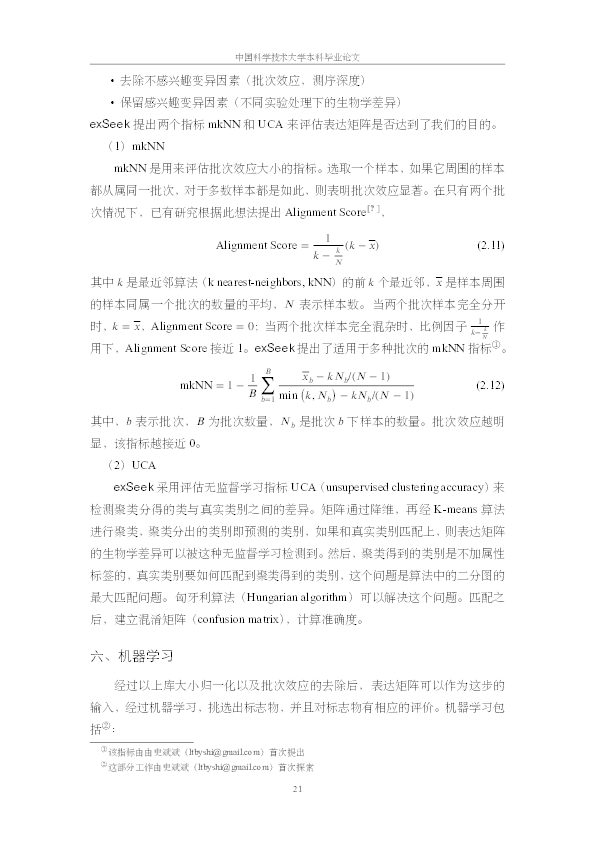

In [11]:
from wand.image import Image as WImage
img = WImage(filename='bin/train.pdf[6]')
img


# PCA

In [59]:
def PCA_plot_with_uca_score_sns(ax,data,sampleclass,batchinfo, method = 'PCA'):
    X = log_transform(data).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    X_pca = transform.fit_transform(X)
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    plot_table = pd.concat((plot_table,sampleclass.loc[plot_table.index],batchinfo.loc[plot_table.index]),axis=1)
    plot_table.columns = ['Dimension 1','Dimension 2','class','batch']
    plot_table = plot_table.sort_values(by='batch')
    classnum = np.unique(plot_table.iloc[:,2]).shape[0]
    sns.scatterplot(ax=ax,data=plot_table,x="Dimension 1", y="Dimension 2",
                    palette=legendhandle(np.unique(plot_table.batch)) , hue="batch",style='class',s=50,linewidth=0.01)
    
    #plt.figure(linewidth=30.5)

        #legend.get_title().set_fontweight('normal')
        #legend.get_title().set_fontsize(6.5)
    #ax.legend(bbox_to_anchor = (1, 1))
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #uca_score = get_clustering_score(data, sampleclass)
    #ax.set_title(method_type + ': ' +'UCA = {:.3f}'.format(uca_score) +', ' + 'kBET = {:.3f}'.format(kbet_score))
    #ax.annotate('UCA score: {:.6f}'.format(uca_score),xy=(1,0),xycoords='data',size=6.5)
    #print('Alignment score: {}'.format(knn_score(X_pca, sampleclass.loc[data.columns.values].values.ravel() )))


def log_transform(data, small = 0.01):
    return np.log2(data + small)

In [64]:
fontsize = 6.5
fontscale = 1
fontweight =  'normal'
fonttitle = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontlabel = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontticklabel = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontlegend = {'family':'Arial',
                  'weight' : fontweight, 
              #'linewidth':0.5,
                  'size' : fontsize*fontscale}
fontcbarlabel = {'family':'Arial',
                 'weight' : fontweight, 
                 #'Rotation' : 270,
                 #'labelpad' : 25,
                 'size' : fontsize*fontscale}
fontcbarticklabel = {'family':'Arial',#Helvetica
                 'weight' : fontweight, 
                 'size' : (fontsize-1)*fontscale}

def std_plot(ax,xlabel=None,ylabel=None,title=None,
             legendtitle=None,bbox_to_anchor=None,
             labelspacing=0.2,borderpad=0.2,handletextpad=0.2,legendsort=False,markerscale=None,
             xlim=None,ylim=None,
             xbins=None,ybins=None,
             cbar=None,cbarlabel=None,
             moveyaxis=False,sns=False,left=True,rotation=None,xticklabel=None,legendscale=True,h=None,l=None,**kwards):
        # height = 2 font = 6.5
    def autoscale(fig):
        if isinstance(fig,matplotlib.figure.Figure):
            width,height = fig.get_size_inches()
        elif isinstance(fig,matplotlib.axes.Axes):
            width,height = fig.figure.get_size_inches()
        fontscale = height/3
        if width/fontscale > 8:
            warnings.warn("Please reset fig's width. When scaling the height to 2 in, the scaled width '%.2f' is large than 8"%(width/fontscale),UserWarning)
        return fontscale
    
    class fontprop:
        def init(self,fonttitle=None,fontlabel=None,fontticklabel=None,fontlegend=None,fontcbarlabel=None,fontcbarticklabel=None):
            self.fonttitle = fonttitle
            self.fontlabel = fontlabel
            self.fontticklabel = fontticklabel
            self.fontlegend = fontlegend
            self.fontcbarlabel = fontcbarlabel
            self.fontcbarticklabel = fontcbarticklabel
        def update(self,fontscale):
            self.fonttitle['size'] = self.fonttitle['size']*fontscale
            self.fontlabel['size'] = self.fontlabel['size']*fontscale
            self.fontticklabel['size'] = self.fontticklabel['size']*fontscale
            self.fontlegend['size'] = self.fontlegend['size']*fontscale
            self.fontcbarlabel['size'] = self.fontcbarlabel['size']*fontscale
            self.fontcbarticklabel['size'] = self.fontcbarticklabel['size']*fontscale
        def reset(self,fontscale):
            self.fonttitle['size'] = self.fonttitle['size']/fontscale
            self.fontlabel['size'] = self.fontlabel['size']/fontscale
            self.fontticklabel['size'] = self.fontticklabel['size']/fontscale
            self.fontlegend['size'] = self.fontlegend['size']/fontscale
            self.fontcbarlabel['size'] = self.fontcbarlabel['size']/fontscale
            self.fontcbarticklabel['size'] = self.fontcbarticklabel['size']/fontscale
    fontscale = autoscale(ax)
    font = fontprop()
    font.init(fonttitle,fontlabel,fontticklabel,fontlegend,fontcbarlabel,fontcbarticklabel)
    font.update(fontscale)
    
    pyplot.draw()
    #plt.figure(linewidth=30.5)
    if xlim is not None:  
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
    #pyplot.draw()
    if xbins is not None:
        locator = MaxNLocator(nbins=xbins)
        locator.set_axis(ax.xaxis)
        ax.set_xticks(locator())
    if ybins is not None:
        locator = MaxNLocator(nbins=ybins)
        locator.set_axis(ax.yaxis)
        ax.set_yticks(locator())
    pyplot.draw()
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(xlabel,fontdict = font.fontlabel,labelpad=(fontsize-1)*fontscale)
    ax.set_ylabel(ylabel,fontdict = font.fontlabel,labelpad=(fontsize-1)*fontscale)
    if (rotation is not None) & (xticklabel is not None) :
        ax.set_xticklabels(xticklabel,fontticklabel,rotation=rotation)
    elif (xticklabel is not None) &(rotation is None):
        ax.set_xticklabels(xticklabel,fontticklabel)
    elif (xticklabel is None) &(rotation is None):
        ax.set_xticklabels(ax.get_xticklabels(),fontticklabel)
    elif (rotation is not None) & (xticklabel is None):
        ax.set_xticklabels(ax.get_xticklabels(),fontticklabel,rotation=rotation)
    ax.set_yticklabels(ax.get_yticklabels(),font.fontticklabel)

    if moveyaxis is True:
        #fontticklabel 
        ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(not left)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(0.5*fontscale)
    ax.spines['bottom'].set_linewidth(0.5*fontscale)
    ax.spines['left'].set_linewidth(0.5*fontscale)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    
    ax.tick_params(direction='out', pad=2*fontscale,width=0.5*fontscale)
    #ax.spines['bottom']._edgecolor="#000000"
    #ax.spines['left']._edgecolor="#000000"
    if title is not None:
        ax.set_title(title,fontdict = font.fonttitle)
    if legendscale is True:
        if (h is None)&(l is None):
            legend = ax.legend(prop=font.fontlegend,
                  bbox_to_anchor=bbox_to_anchor,
                  labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        else:
            legend = ax.legend(h,l,prop=font.fontlegend,
                  bbox_to_anchor=bbox_to_anchor,
                  labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
    if legendtitle is not None:
        #if legendloc is None:
        #    legendloc="best"
        legend = ax.legend(title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        ax.legend_.get_frame()._linewidth=0.5*fontscale
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(fontscale*fontsize)
        if legendsort is True:
            # h: handle l:label
            h,l = ax.get_legend_handles_labels()
            l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h,l,title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
            ax.legend_.get_frame()._linewidth=0.5*fontscale
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(fontscale*fontsize)
        if sns is True:
            h,l = ax.get_legend_handles_labels()
            #l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h[1:],l[1:],title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
            ax.legend_.get_frame()._linewidth=0.5*fontscale
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(fontscale*fontsize)
    else:
        legend = ax.legend(handles=h,labels=l,title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        ax.legend_.get_frame()._linewidth=0.5*fontscale
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(fontscale*fontsize)

    if cbar is not None:
        #locator, formatter = cbar._get_ticker_locator_formatter()
        #ticks, ticklabels, offset_string = cbar._ticker(locator, formatter)
        #cbar.ax.spines['top'].set_visible(False)
        #cbar.ax.spines['right'].set_visible(False)
        #cbar.ax.spines['bottom'].set_visible(False)
        #cbar.ax.spines['left'].set_visible(False)
        cbar.ax.tick_params(direction='out', pad=3*fontscale,width=0*fontscale,length=0*fontscale)
        cbar.set_label(cbarlabel,fontdict = font.fontcbarlabel,Rotation=270,labelpad=fontscale*(fontsize+1))
        cbar.ax.set_yticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),font.fontcbarticklabel)
    font.reset(fontscale)
    return ax





In [65]:
sample_class = pd.read_table('/home/xieyufeng/fig3/data/cfRNA/sample_classes.txt', index_col=0)
batch_info = pd.read_table('/home/xieyufeng/fig3/data/cfRNA/batch_info.txt', index_col=0)
batch_info[batch_info.dataset=='lulab_hcc']='GSE123972'


In [66]:
sample_class[sample_class.label=='Normal']='HD'
sample_class[sample_class.label!='HD']='HCC'

In [67]:
batch_info = pd.read_table('/home/zhaotianxiao/fig3/batch_info.txt', index_col=0)
batch_info[batch_info.dataset=='lulab_hcc']='GSE123972'

In [68]:
kbet_table = pd.read_table('/home/xieyufeng/fig3/output/cfRNA/select_preprocess_method/kbet_score/mirna_and_domains/summary.txt', index_col = 0)
uca_table = pd.read_table('/home/xieyufeng/fig3/output/cfRNA/select_preprocess_method/uca_score/mirna_and_domains/summary.txt', index_col = 0)

In [69]:
kbet_table = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/select_preprocess_method/kbet_score/mirna_and_domains/summary.txt', index_col = 0)
uca_table = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/select_preprocess_method/uca_score/mirna_and_domains/summary.txt', index_col = 0)

In [70]:
knn_summary = pd.read_csv('/home/shibinbin/projects/exSeek-dev/output/cfRNA/select_preprocess_method/knn_score/mirna_and_domains/summary.txt',sep='\t')
knn_summary = knn_summary.set_index('preprocess_method')

In [71]:
fontsize

6.5

In [72]:
method = 'filter.null.Norm_RLE.Batch_limma_1'
data = pd.read_table('/home/xieyufeng/fig3/output/cfRNA/matrix_processing/'+method+'.mirna_and_domains.txt',
                          index_col = 0)
fig, (ax,lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios":[4,1]},figsize=(8.5,6))
PCA_plot_with_uca_score_sns(ax,data,sample_class, batch_info,method='PCA')

h,l=ax.get_legend_handles_labels()
for loc in range(len(l)):
    if l[loc] == 'GSE94582_NEBNext':
        l[loc] = 'GSE94582_1'
    elif l[loc] == 'GSE94582_Other':
        l[loc] = 'GSE94582_2'
    elif l[loc] == 'GSE94582_TruSeq':
        l[loc] = 'GSE94582_3'
        
std_plot(ax,'Dimension 1','Dimension 2',
             title='RLE with Limma',
             xbins=4,ybins=5,h=h,l=l,bbox_to_anchor=(0.9,0.8),markerscale=1.5)
ax.legend_.remove()
lax.axis("off")
std_plot(lax,h=h,l=l,bbox_to_anchor=(1,0.8),markerscale=2,labelspacing=0.3)
lax.legend_.get_frame()._linewidth=0
fig.tight_layout()
fig.savefig(savepath+'RLE with Limma.eps')
embed_pdf_figure()
print('UCA = {:.3f}'.format(uca_summary.loc[method].values[0]) +', ' + 'mkNN = {:.3f}'.format(1-knn_summary.loc[method].values[0]))

UCA = 0.692, mkNN = 0.712


In [44]:
knn_summary

,knn_score
preprocess_method,
filter.null.Norm_CPM_top.Batch_null_1,0.965693
filter.null.Norm_RLE.Batch_null_1,0.964789
filter.null.Norm_TMM.Batch_null_1,0.958972
filter.null.Norm_CPM.Batch_null_1,0.958100
filter.null.Norm_TMM.Batch_RUV_1,0.944290
filter.null.Norm_RLE.Batch_RUV_1,0.943549
filter.null.Norm_CPM_top.Batch_RUV_1,0.933820
filter.null.Norm_CPM.Batch_RUV_1,0.931906
filter.null.Norm_TMM.Batch_RUVn_1,0.727841


In [86]:
method = 'filter.null.Norm_RLE.Batch_null'
data = pd.read_table('/home/xieyufeng/fig3/output/cfRNA/matrix_processing/'+method+'.mirna_and_domains.txt',
                          index_col = 0)

fig, ax = plt.subplots(figsize=(6.1,6))
PCA_plot_with_uca_score_sns(ax,data,sample_class, batch_info,method='PCA')
std_plot(ax,'Dimension 1','Dimension 2',title='RLE',xbins=4,ybins=5)

ax.legend_.remove()
fig.tight_layout()
fig.savefig(savepath+'RLE with Null_noleg.eps')
embed_pdf_figure()
method = 'filter.null.Norm_RLE.Batch_null'
#print('UCA = {:.3f}'.format(uca_summary.loc[method].values[0]) +', ' + 'mkNN = {:.3f}'.format(1-knn_summary.loc[method].values[0]))

# variance explained

In [49]:
def var_ex(mat,anno_info):
    from scipy.stats import f
    def list201(array):
        dataframe = pd.DataFrame()
        for i in np.unique(array):
            dataframe[i] = array==i
        return dataframe

    rsquared_mat = pd.DataFrame()
    bms = pd.DataFrame()
    wms = pd.DataFrame()
    fvalue = pd.DataFrame()
    p = pd.DataFrame()
    rsquared_cutoff=pd.DataFrame()
    tss_all = (np.var(mat.T)*mat.shape[1]).tolist()
    var_list = anno_info.columns
    for var in var_list:
        anno = anno_info[var]
        if len(np.unique(anno))<=1:
            warnings.warn("ignoring '%s' with fewer than 2 unique levels"%var,UserWarning)
        keep = ~anno.isna()
        if np.all(keep):
            tss = tss_all
        else:
            anno = anno[keep]
            mat = mat.loc[:,keep]
            tss = np.array(np.var(mat.T)*mat.shape[1])
        anno2class = list201(anno)
        wss = 0
        for i in anno2class.columns:
            mat_select=mat.iloc[:,np.where(anno2class[i])[0]]
            wss = wss + np.array(np.var(mat_select.T)*mat_select.shape[1])
        #display(wss)
        rsquared_mat[var] = 1-wss/tss
        bms[var] = (tss-wss)/(anno2class.shape[1]-1)
        wms[var] = wss/(len(anno)-anno2class.shape[1])
        fvalue[var] = bms[var]/wms[var]
        p[var] = [1-f.cdf(i,anno2class.shape[1]-1,len(anno)-anno2class.shape[1]) for i in fvalue[var]]
        rsquared_cutoff[var] = [1-1/(f.isf(0.05, anno2class.shape[1]-1, len(anno)-anno2class.shape[1])*\
                               (anno2class.shape[1]-1)/(len(anno)-anno2class.shape[1])+1)]
    return rsquared_mat,rsquared_cutoff,p

In [50]:
batchinfo_path ="/home/xieyufeng/fig3/data/cfRNA/batch_info.txt"
batchinfo_path ="/home/xieyufeng/fig3/data/cfRNA/batch_info.txt"
classinfo_path = "/home/xieyufeng/fig3/data/cfRNA/sample_classes.txt"
mat1_path="/home/xieyufeng/fig3/output/cfRNA/matrix_processing/filter.null.Norm_RLE.Batch_null.mirna_and_domains.txt"
mat2_path="/home/xieyufeng/fig3/output/cfRNA/matrix_processing/filter.null.Norm_RLE.Batch_limma_1.mirna_and_domains.txt"


In [51]:
mat1 = pd.read_csv(mat1_path,sep='\t')
mat2 = pd.read_csv(mat2_path,sep='\t')
batch_info = pd.read_csv(batchinfo_path,sep='\t')
batch_info = pd.read_table('/home/zhaotianxiao/fig3/batch_info.txt')
sample_info = pd.read_csv(classinfo_path,sep='\t')
anno_info = pd.merge(batch_info,sample_info,on=['sample_id'])
anno_info = anno_info.set_index('sample_id')
anno_info = anno_info.loc[mat1.columns]
#anno_info = anno_info.reset_index()
rsquared_mat1,rsquared_cutoff1,p1 = var_ex(mat1,anno_info)
anno_info = anno_info.loc[mat2.columns]
rsquared_mat2,rsquared_cutoff2,p2 = var_ex(mat2,anno_info)

In [72]:
import matplotlib.gridspec as gridspec
def r2mat21class(rsquared_mat1=None,rsquared_mat2=None,rsquared_cutoff=rsquared_cutoff1,p1=None,p2=None):
    fig =plt.figure(figsize=(6,4))
    gs = gridspec.GridSpec(2, rsquared_mat1.shape[1],height_ratios=[4,1])
    #fig,(axes,lax)=plt.subplots(2,rsquared_mat1.shape[1],gridspec_kw={"height_ratios":[4,1]},figsize=(6,4))
    lax = fig.add_subplot(gs[1, :])
    pyplot.draw()
    for i in range(len(rsquared_mat1.columns)):
        axes = fig.add_subplot(gs[0, i])
        var = rsquared_mat1.columns[i]
        plot_mat = pd.DataFrame([rsquared_mat1[var],rsquared_mat2[var]]).T
        plot_mat.columns=['before batch removal','after batch removal']
        cutoff = rsquared_cutoff[var].iloc[0]
        #axes[i].set_xscale('log',subsx=[-2,-1,0,1,2])
        #axes[i].hist(plot_mat.before,500,density=1)
        sns.kdeplot(plot_mat['before batch removal'],ax=axes,c='#80b1d3')#,bw=0.001,kernel='gau')
        sns.kdeplot(plot_mat['after batch removal'],ax=axes,c='#fb8072')#,bw=0.001)
        axes.axvline(x=cutoff,linestyle='--',linewidth=0.5,c='k')
        axes.set_xticks([-2,-1,0,1,2])#,cutoff])
        axes.set_xticklabels([0.01,0.1,1,10,100])#,'%.1f'%math.pow(10,cutoff)])
        ymax,ymin = max(axes.get_yticks()),min(axes.get_yticks())
        axes.annotate('%.2f'%math.pow(10,cutoff),xy=(cutoff+0.1,0.05*ymin+0.95*ymax),fontfamily='Arial',fontsize=6.5*autoscale(fig))
        axes.legend(title='state',prop=fontlegend)
        if i==0:
            if var=='dataset':
                std_plot(axes,'Variance explained%','Density',legendtitle='state',legendsort=False,title='Batches',xlim=[-2,2],bbox_to_anchor=(1, 0.75))
            elif var=='label':
                std_plot(axes,'Variance explained%','Density',legendtitle='state',legendsort=False,title='Cancer/Normal',xlim=[-2,2],bbox_to_anchor=(1, 0.75))
        else:
            if var=='dataset':
                std_plot(axes,'Variance explained%','',legendtitle='state',legendsort=False,title='Batches',xlim=[-2,2],bbox_to_anchor=(1,-0.2))
            elif var=='label':  
                std_plot(axes,'Variance explained%','',legendtitle='state',legendsort=False,title='Cancer/Normal',xlim=[-2,2],bbox_to_anchor=(1,-0.3),ncol=2)
        axes.legend_.get_frame()._linewidth=0
        #axes[i].legend(title='s',prop=fontlegend)
        
        p_mat = pd.DataFrame([p1[var],p2[var]]).T
        p_mat.columns=['before','after']
        #display(p_mat)
        #table = axes[i].table(cellText=np.array([np.int_(np.sum(p_mat<0.05)),
        #                           ['%.2f'%i for i in (np.sum(p_mat<0.05)/len(p_mat))]]),
        #         colLabels=['before','after'],rowLabels=['amount','percentage'],
        #                      colWidths=[0.3,0.3],
        #                      bbox=[0,0,0.5,0.35])
        #table.set_fontsize(6.5)
        if i != len(rsquared_mat1.columns)-1:
            axes.legend_.remove()
        #plt.subplots_adjust(left=0.4, bottom=0.4)
    #axes[-1].axis('off')
    lax.axis("off")
    h,l=axes.get_legend_handles_labels()
    axes.legend_.remove()
    std_plot(lax,h=h,l=l,bbox_to_anchor=(1,1),markerscale=2,labelspacing=0.3,ncol=2)
    fig.tight_layout() 
    fig.savefig(savepath+'variance_explained.eps')
       
    embed_pdf_figure()
r2mat21class(np.log10(rsquared_mat1*100),np.log10(rsquared_mat2*100),np.log10(rsquared_cutoff1*100),p1,p2)


In [ ]:
p_mat = pd.DataFrame([p1.label,p2.label]).T
p_mat.columns=['before','after']
np.sum(p_mat<0.01)
